### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Agregando Columna para identificar cada tienda.
tienda['tienda'] = 'tienda_1'
tienda2['tienda'] = 'tienda_2'
tienda3['tienda'] = 'tienda_3'
tienda4['tienda'] = 'tienda_4'

# Unimos todos en un solo DataFrame
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# AL imprimir verificamos cada columna de cada tienda y su estrucutura.Tambien resumen por tienda.

resumen_por_tienda = df_total.groupby('tienda').agg({'Producto':'count','Precio':'mean','Costo de envío':'mean','Calificación':'mean'}).reset_index()
resumen_por_tienda.columns = ['Tienda','Total de Productos Vendidos','Precio Promedio','Envío Promedio','Calificacíon Promedio']

# Mostrando tabla formateada.
from IPython.display import display
display(resumen_por_tienda.style.set_caption("Resumen por Tienda").format({'Precio Promedio':'${:,.2f}','Envío Promedio':'${:,.2f}','Calificacíon Promedio':'{:,.2f}'}))

,Tienda,Total de Productos Vendidos,Precio Promedio,Envío Promedio,Calificacíon Promedio
0,tienda_1,2359,"$487,867.91","$26,018.61",3.98
1,tienda_2,2359,"$473,227.43","$25,216.24",4.04
2,tienda_3,2359,"$465,459.77","$24,805.68",4.05
3,tienda_4,2358,"$440,362.89","$23,459.46",4.00


In [ ]:
df_total.head()
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


,tienda,Precio
0,tienda_1,"$1,150,880,400.00"
1,tienda_2,"$1,116,343,500.00"
2,tienda_3,"$1,098,019,600.00"
3,tienda_4,"$1,038,375,700.00"


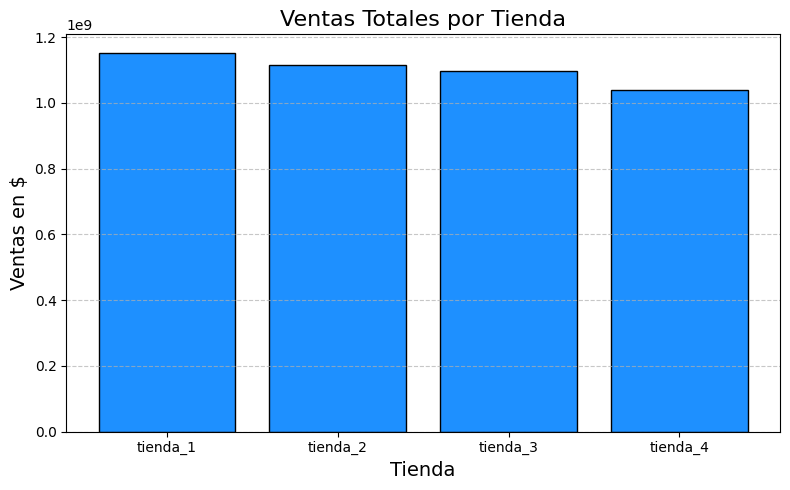

In [ ]:
#Aqui vamos a considerar tres puntos :
#1.Ventas totales por tienda:
import matplotlib.pyplot as plt
def analizar_ventas_por_tienda(df,mostrar_grafico=True):

  ventas_por_tienda = df_total.groupby('tienda')['Precio'].sum().reset_index()
  display(ventas_por_tienda.style.set_caption("Ventas Totales por Tienda").format({'Precio':'${:,.2f}'}))

# Gráfico de barras con estilo
  if mostrar_grafico:
      plt.figure(figsize=(8,5))
      plt.bar(ventas_por_tienda['tienda'], ventas_por_tienda['Precio'], color='dodgerblue', edgecolor='black')
      plt.title('Ventas Totales por Tienda', fontsize=16)
      plt.xlabel('Tienda', fontsize=14)
      plt.ylabel('Ventas en $', fontsize=14)
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.tight_layout()
      plt.show()

  return ventas_por_tienda

ventas_por_tienda = analizar_ventas_por_tienda(df_total)


,count
tienda,
tienda_1,2359
tienda_2,2359
tienda_3,2359
tienda_4,2358


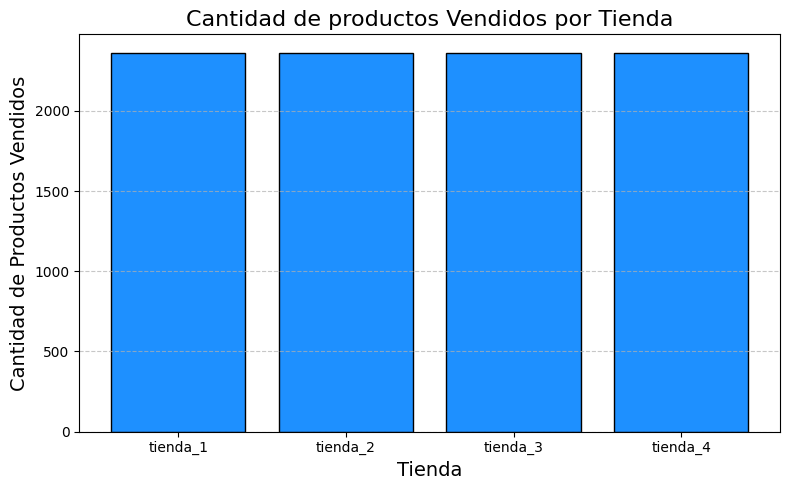

In [ ]:
#2.- Cantidad de productos vendidos por cada tienda:
import matplotlib.pyplot as plt
# Cantidad de productos vendidos por tienda (conteo de filas)
def graficar_ventas_por_tienda(df):

    cantidad_por_tienda = df_total['tienda'].value_counts()
    display(cantidad_por_tienda)

    # Gráfico de barras
    plt.figure(figsize=(8,5))
    plt.bar(cantidad_por_tienda.index, cantidad_por_tienda.values, color='dodgerblue', edgecolor='black')
    plt.title('Cantidad de productos Vendidos por Tienda', fontsize=16)
    plt.xlabel('Tienda', fontsize=14)
    plt.ylabel('Cantidad de Productos Vendidos', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# LLamamos a la funcion.
graficar_ventas_por_tienda(df_total)


Ventas Totales por Tienda


,tienda,Precio
0,tienda_4,"$1,038,375,700"
1,tienda_3,"$1,098,019,600"
2,tienda_2,"$1,116,343,500"
3,tienda_1,"$1,150,880,400"


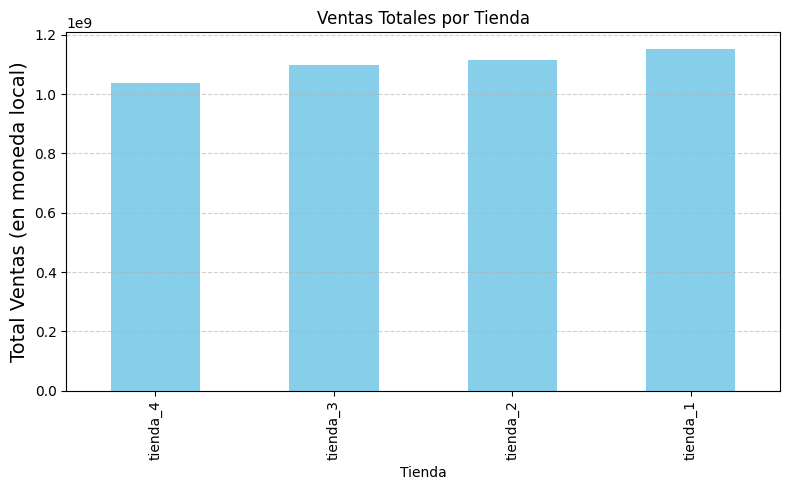

Ventas Mensuales por Tienda


tienda,tienda_1,tienda_2,tienda_3,tienda_4
Mes,,,,
2020-01,33084300.0,31129500.0,23782900.0,19298700.0
2020-02,40054000.0,17388800.0,27577000.0,22880400.0
2020-03,31562300.0,30515900.0,30024400.0,28533100.0
2020-04,33666100.0,27646600.0,35343500.0,39492700.0
2020-05,38582900.0,25462300.0,26123800.0,31991400.0
2020-06,26296700.0,26056100.0,17464300.0,26853200.0
2020-07,35085500.0,23547500.0,33602800.0,26925000.0
2020-08,31126500.0,23472800.0,25875600.0,31207300.0
2020-09,30243800.0,31128300.0,26668600.0,28200000.0


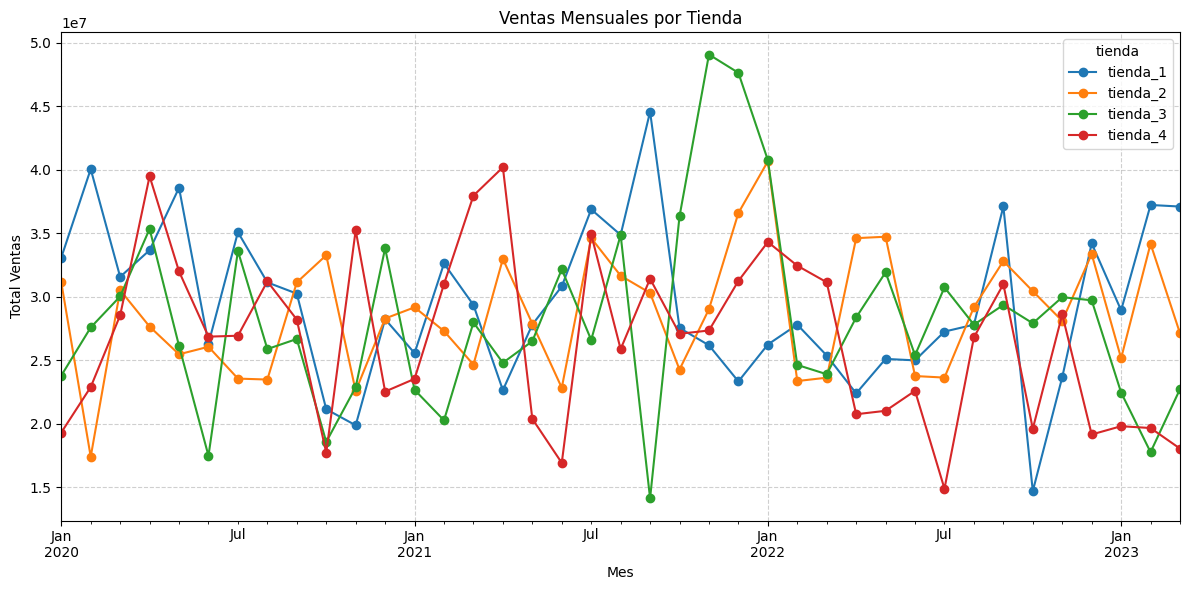

In [ ]:
#3.- Ventas por fecha:
import matplotlib.pyplot as plt
def graficar_resumen_ventas(df):
    df= df.copy()
    df['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'],dayfirst=True)

    #Totales por tienda.
    ventas_totales = df.groupby('tienda')['Precio'].sum().sort_values()
    ventas_totales_df = ventas_totales.reset_index()
    ventas_totales_df['Precio'] = ventas_totales_df['Precio'].map('${:,.0f}'.format)


    print("Ventas Totales por Tienda")
    display(ventas_totales_df)

    plt.figure(figsize=(8,5))
    ventas_totales.plot(kind='bar',color='skyblue')
    plt.title('Ventas Totales por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Total Ventas (en moneda local)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    df['Mes'] = df['Fecha de Compra'].dt.to_period('M')
    ventas_mensuales = df.groupby(['Mes','tienda'])['Precio'].sum().unstack()
    print("Ventas Mensuales por Tienda")
    display(ventas_mensuales)

    ventas_mensuales.plot(figsize=(12,6),marker='o')
    plt.title('Ventas Mensuales por Tienda')
    plt.xlabel('Mes')
    plt.ylabel('Total Ventas')
    plt.grid(True,linestyle='--',alpha=0.6)
    plt.tight_layout()
    plt.show()

graficar_resumen_ventas(df_total)



# 2. Ventas por categoría

,Categoría del Producto,Precio
0,Artículos para el hogar,"$57,579,800.00"
1,Deportes y diversión,"$142,977,700.00"
2,Electrodomésticos,"$1,324,751,100.00"
3,Electrónicos,"$1,660,576,500.00"
4,Instrumentos musicales,"$348,772,600.00"
5,Juguetes,"$73,604,400.00"
6,Libros,"$37,696,100.00"
7,Muebles,"$757,661,000.00"


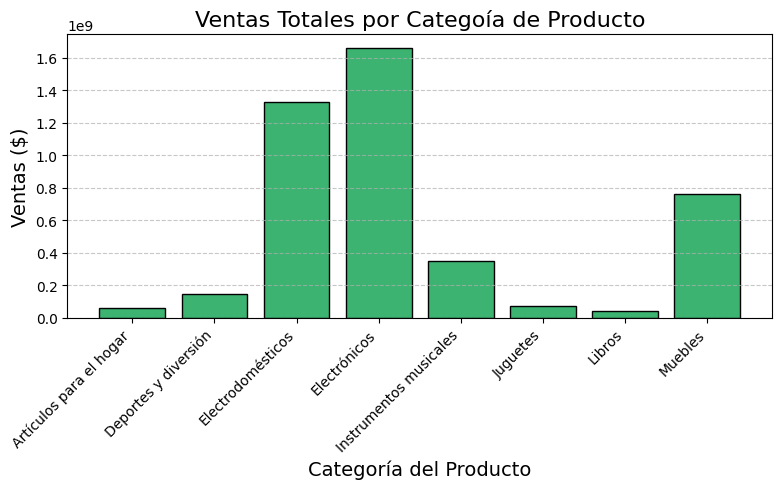

In [ ]:
# Para tener un mejor entendimiento vamos a sumaremos el precio de cada grupo de categoria:
import matplotlib.pyplot as plt
def graficar_ventas_por_categoria(df):
      #Agrupar y sumar ventas por categoria
      ventas_por_categoria = df_total.groupby('Categoría del Producto')['Precio'].sum().reset_index()

      if ventas_por_categoria.empty:
          print("No existe datos de ventas por categoría para ser mostrados.")
          return
      # Mostra tablea con formato.
      display(ventas_por_categoria.style.set_caption("Ventas Totales por Categoría de Producto").format({'Precio':'${:,.2f}'}))

      #GRafico de barras ventas por categoria.
      plt.figure(figsize = (8,5))
      plt.bar(ventas_por_categoria['Categoría del Producto'],ventas_por_categoria['Precio'], color='mediumseagreen', edgecolor='black')
      plt.title('Ventas Totales por Categoía de Producto', fontsize=16)
      plt.xlabel('Categoría del Producto', fontsize=14)
      plt.ylabel('Ventas ($)', fontsize=14)
      plt.xticks(rotation=45, ha='right')
      plt.grid(axis='y',linestyle= '--', alpha=0.7)
      plt.tight_layout()
      plt.show()

graficar_ventas_por_categoria(df_total)



# 3. Calificación promedio de la tienda


,tienda,Calificación,Clasificación
0,tienda_1,3.976685,Bueno
1,tienda_2,4.037304,Bueno
2,tienda_3,4.048326,Bueno
3,tienda_4,3.995759,Bueno


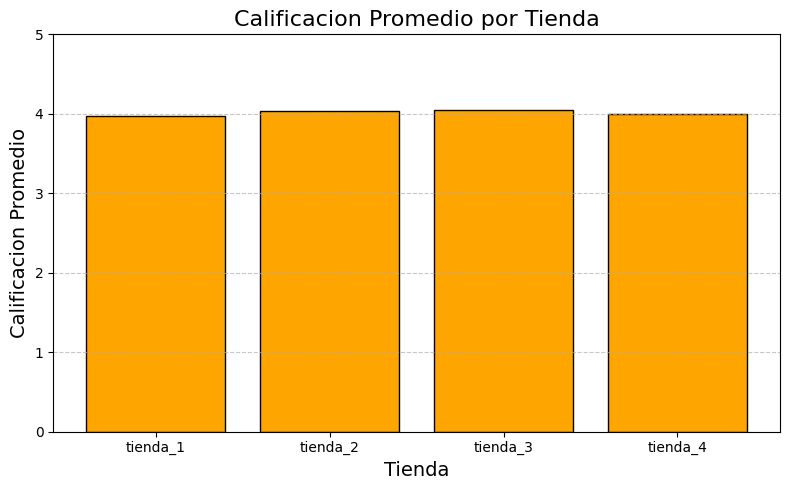

In [ ]:
#Esto nos dara la idea de como el cliente califica la tienda sacando los promedio.
import matplotlib.pyplot as plt
def clasificar_calificacion(puntaje):
    if puntaje >= 4.5:
        return 'Excelente'
    elif puntaje >= 3.5:
        return 'Bueno'
    elif puntaje >= 2.5:
        return 'Regular'
    else:
        return 'Malo'
# Calculamos promedio de calificacion por tiendas.
calificacion_promedio = df_total.groupby('tienda')['Calificación'].mean().reset_index()
# Clasificamos cada tienda usando un bucle y funcion.
calificacion_promedio['Clasificación'] = calificacion_promedio['Calificación'].apply(clasificar_calificacion)
# Mostrando table con estilo.
display(calificacion_promedio.style.set_caption("Calificación Promedio y Clasificación por Tienda "))

# Tambien se muestra su respectivo grafico
plt.figure(figsize=(8,5))
plt.bar(calificacion_promedio['tienda'],calificacion_promedio['Calificación'],color='orange',edgecolor='black')
plt.title('Calificacion Promedio por Tienda',fontsize=16)
plt.xlabel('Tienda',fontsize=14)
plt.ylabel('Calificacion Promedio',fontsize=14)
plt.ylim(0,5)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()



# 4. Productos más y menos vendidos

Producto,Cantidad Vendida
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199
Bloques de construcción,199


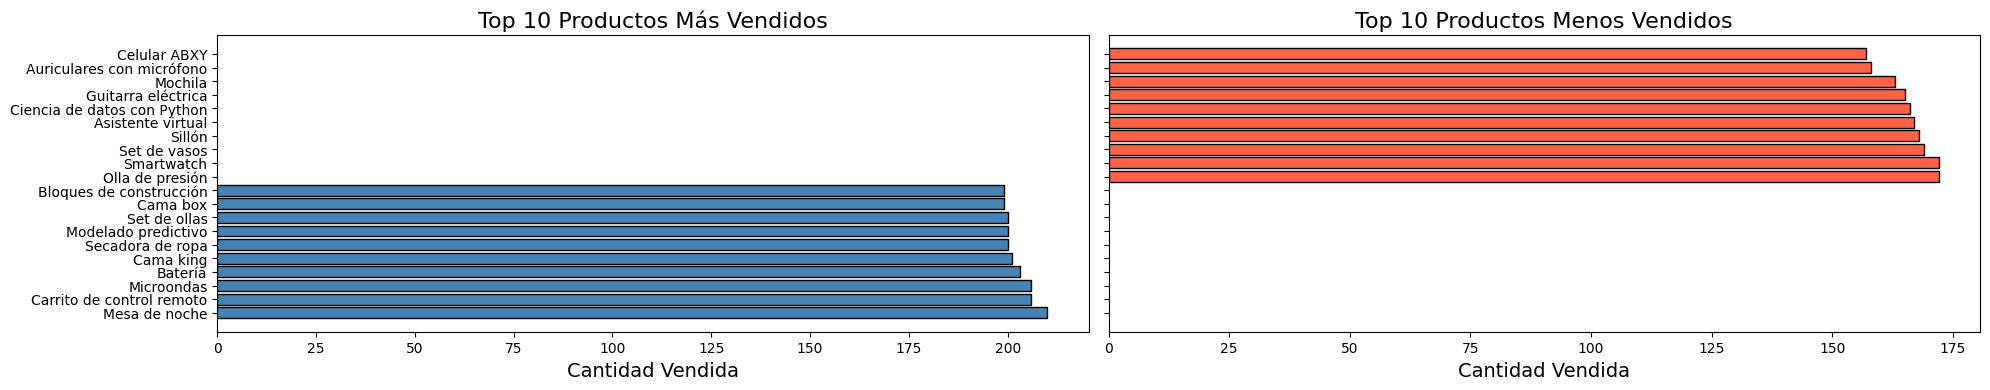

Top 5 Productos Más Vendidos:


,Producto,Cantidad Vendida
0,Mesa de noche,210
1,Carrito de control remoto,206
2,Microondas,206
3,Batería,203
4,Cama king,201


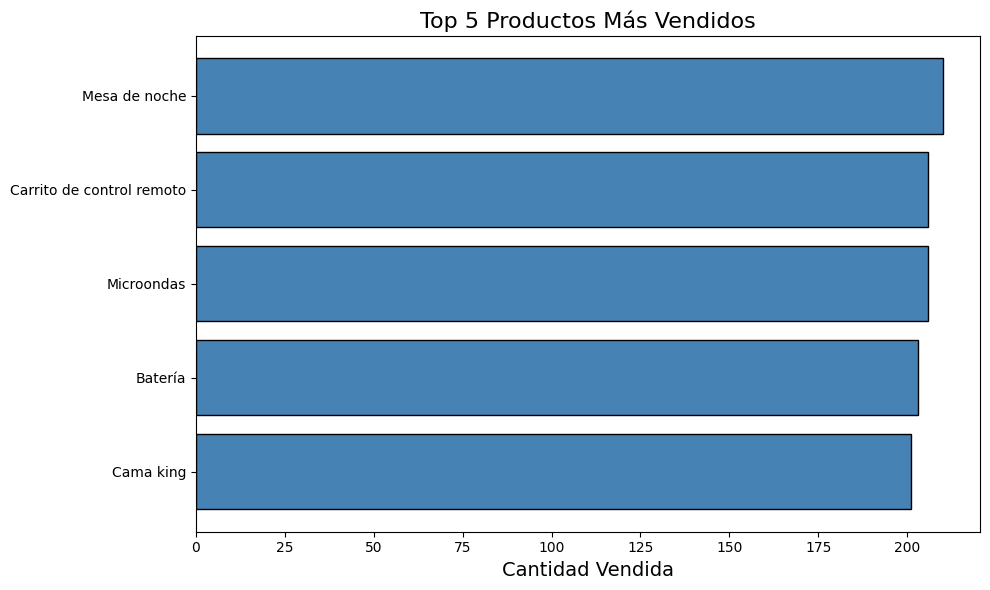

Top 5 Productos Menos Vendidos:


,Producto,Cantidad Vendida
46,Ciencia de datos con Python,166
47,Guitarra eléctrica,165
48,Mochila,163
49,Auriculares con micrófono,158
50,Celular ABXY,157


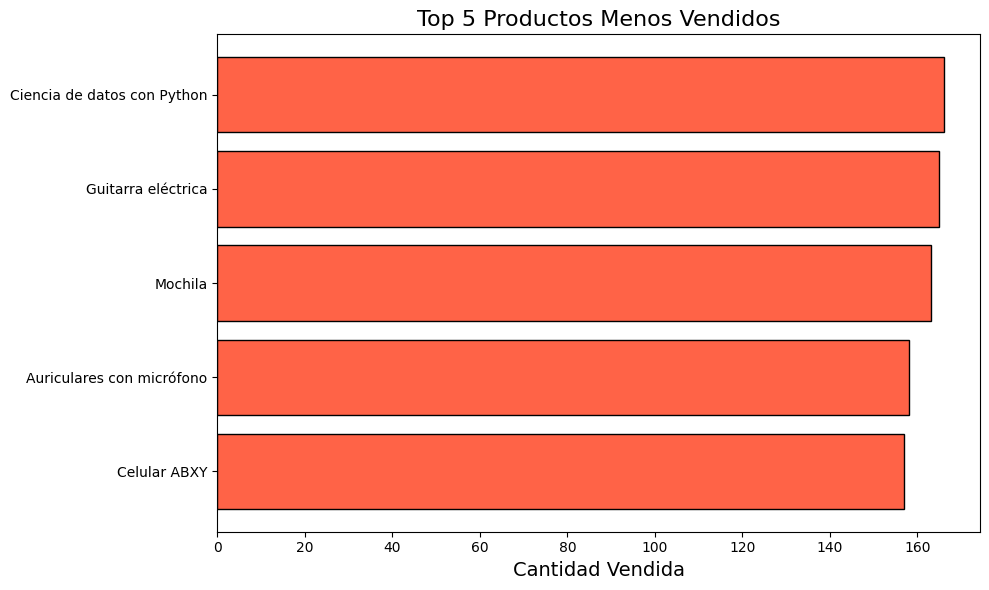

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def mostrar_top_productos(df, top_n=10, mostrar='ambos'):
    """
    Muestra los productos más y/o menos vendidos con tablas y gráficos.

    Parámetros:
    - df: DataFrame con columna 'Producto'
    - top_n: número de productos a mostrar en cada top (default 10)
    - mostrar: 'mas', 'menos' o 'ambos' (default 'ambos')
    """
    products_sold = df['Producto'].value_counts().reset_index()
    products_sold.columns = ['Producto', 'Cantidad Vendida']

    if mostrar in ['mas', 'ambos']:
        top_mas = products_sold.head(top_n)
    if mostrar in ['menos', 'ambos']:
        top_menos = products_sold.tail(top_n)

    # Mostrar tablas
    if mostrar == 'ambos':
        html_code = f"""
        <div style="display: flex; justify-content: space-between;">
            <div style="margin-right: 70px;">
                <h3 style="color: steelblue;">Top {top_n} Productos Más Vendidos</h3>
                {top_mas.to_html(index=False)}
            </div>
            <div>
                <h3 style="color: tomato;">Top {top_n} Productos Menos Vendidos</h3>
                {top_menos.to_html(index=False)}
            </div>
        </div>
        """
        display(HTML(html_code))
    elif mostrar == 'mas':
        print(f"Top {top_n} Productos Más Vendidos:")
        display(top_mas)
    elif mostrar == 'menos':
        print(f"Top {top_n} Productos Menos Vendidos:")
        display(top_menos)

    # Graficos
    if mostrar == 'ambos':
        fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
        axes[0].barh(top_mas['Producto'], top_mas['Cantidad Vendida'], color='steelblue', edgecolor='black')
        axes[0].set_title(f'Top {top_n} Productos Más Vendidos', fontsize=16)
        axes[0].set_xlabel('Cantidad Vendida', fontsize=14)
        axes[0].invert_yaxis()

        axes[1].barh(top_menos['Producto'], top_menos['Cantidad Vendida'], color='tomato', edgecolor='black')
        axes[1].set_title(f'Top {top_n} Productos Menos Vendidos', fontsize=16)
        axes[1].set_xlabel('Cantidad Vendida', fontsize=14)
        axes[1].invert_yaxis()

        plt.tight_layout()
        fig.subplots_adjust(top=0.4)
        plt.show()
    elif mostrar == 'mas':
        plt.figure(figsize=(10, 6))
        plt.barh(top_mas['Producto'], top_mas['Cantidad Vendida'], color='steelblue', edgecolor='black')
        plt.title(f'Top {top_n} Productos Más Vendidos', fontsize=16)
        plt.xlabel('Cantidad Vendida', fontsize=14)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    elif mostrar == 'menos':
        plt.figure(figsize=(10, 6))
        plt.barh(top_menos['Producto'], top_menos['Cantidad Vendida'], color='tomato', edgecolor='black')
        plt.title(f'Top {top_n} Productos Menos Vendidos', fontsize=16)
        plt.xlabel('Cantidad Vendida', fontsize=14)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


mostrar_top_productos(df_total, top_n=10, mostrar='ambos')  # muestra ambos tops
mostrar_top_productos(df_total, top_n=5, mostrar='mas')     # solo más vendidos
mostrar_top_productos(df_total, top_n=5, mostrar='menos')   # solo menos vendidos




# 5. Envío promedio por tienda

Costo promedio de envío por tienda


,tienda,Costo de envío
0,tienda_1,"$26,018.61"
1,tienda_2,"$25,216.24"
2,tienda_3,"$24,805.68"
3,tienda_4,"$23,459.46"


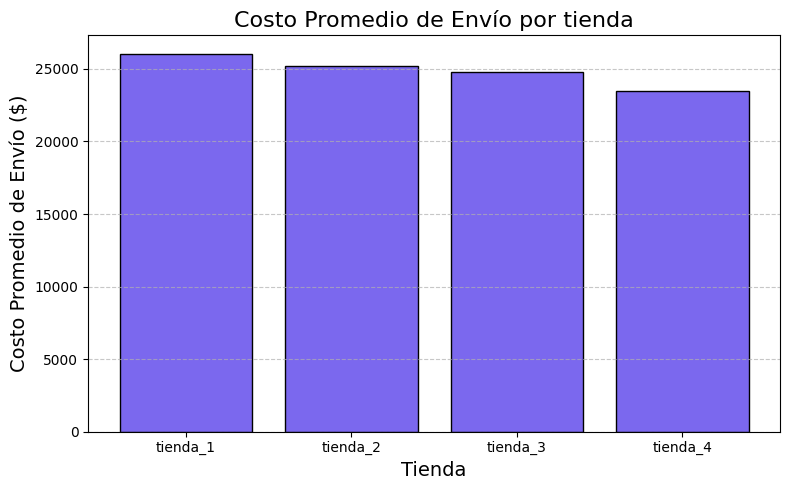

In [ ]:
# Calculo de costo promedio por tienda.
def graficar_costo_promedio_envio_por_tienda(df):
      envio_promedio_por_tienda = df_total.groupby('tienda')['Costo de envío'].mean().reset_index()
      print("Costo promedio de envío por tienda")
      display(envio_promedio_por_tienda.style.set_caption("Costo Promedio de Envío por Tienda").format({'Costo de envío':'${:,.2f}'}))

      #Graficamos tambien asi tenemos mayor observacion.
      plt.figure(figsize=(8,5))
      plt.bar(envio_promedio_por_tienda['tienda'],envio_promedio_por_tienda['Costo de envío'],color = 'mediumslateblue', edgecolor = 'black')
      plt.title('Costo Promedio de Envío por tienda', fontsize=16)
      plt.xlabel('Tienda', fontsize = 14)
      plt.ylabel('Costo Promedio de Envío ($)', fontsize =  14)
      plt.grid(axis='y',linestyle='--', alpha=0.7)
      plt.tight_layout()
      plt.show()
graficar_costo_promedio_envio_por_tienda(df_total)



In [ ]:
print("""
    Conclusión:
    Luego de analizar las ventas registradas por cada tienda tanto en su comportamiento diario como en la tendencia mensual,
    se concluye que la Tienda 4 presenta el menor rendimiento comercial en comparación con las demás sucursales.

    De acuerdo con los datos obtenidos:

    La Tienda 4 acumuló un total de $1,038,376,000, siendo el monto más bajo entre las cuatro tiendas.

    Esta tendencia se mantiene de forma consistente a lo largo de los distintos periodos evaluados.

    Por lo tanto, la Tienda 4 es la principal candidata para ser vendida, ya que su desempeño comercial es inferior al del resto.
    Esta decisión permitirá al señor Juan liberar recursos y explorar nuevas oportunidades de negocio que ofrezcan mayor rentabilidad.

""")



    Conclusión:
    Luego de analizar las ventas registradas por cada tienda tanto en su comportamiento diario como en la tendencia mensual, 
    se concluye que la Tienda 4 presenta el menor rendimiento comercial en comparación con las demás sucursales.

    De acuerdo con los datos obtenidos:

    La Tienda 4 acumuló un total de $1,038,376,000, siendo el monto más bajo entre las cuatro tiendas.

    Esta tendencia se mantiene de forma consistente a lo largo de los distintos periodos evaluados.

    Por lo tanto, la Tienda 4 es la principal candidata para ser vendida, ya que su desempeño comercial es inferior al del resto. 
    Esta decisión permitirá al señor Juan liberar recursos y explorar nuevas oportunidades de negocio que ofrezcan mayor rentabilidad.


